In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df1=df.iloc[:,1:]
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
df1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]),columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
scaled_df

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [8]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


[200.00000000000003, 104.96163315756871, 80.08569526137275, 57.55425863091104, 50.211423884532635, 45.65387908447521, 40.78917725839557, 36.54104507854771, 31.331371290009606]


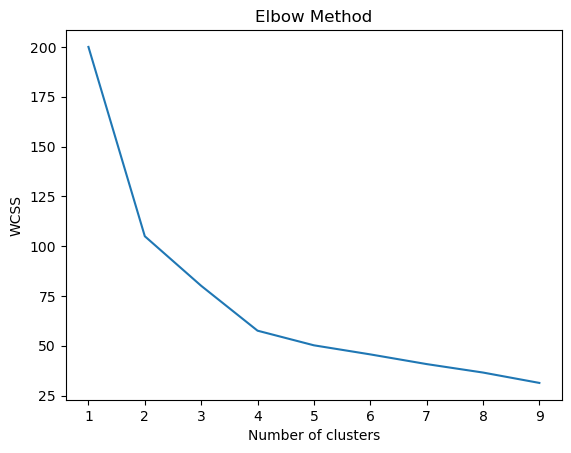

In [22]:
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3)

In [11]:
clusters_new.labels_

array([0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [12]:
set(clusters_new.labels_)

{0, 1, 2}

In [13]:
df['clusterid_new']=clusters_new.labels_
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [14]:
df.sort_values(by="clusterid_new")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [15]:
clusters_new.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [16]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165000,255.250,68.400000,29.16500
1,1,3.971429,86.500,51.928571,12.70000
2,2,5.656250,138.875,73.875000,18.78125


In [17]:
df[df['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [18]:
df[df['clusterid_new']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
3,Arkansas,8.8,190,50,19.5,1
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1


In [19]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_df,clusters_new.labels_,metric='euclidean')
score

0.30813622648945616

In [20]:
df1=pd.DataFrame()
df1['cluster_id']=clusters_new.labels_
df1

,cluster_id
0,0
1,0
2,0
3,1
4,0
5,0
6,2
7,2
8,0
9,0
